In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: tf.config.experimental.set_memory_growth(gpu, True)
    
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Layer, Input

In [2]:
model_name = 'vgg'

cifar100_model_feat = np.load(f'./data/CIFAR100_{model_name}_train_feat.npy')
print(cifar100_model_feat.shape)

cifar100_vanilla = np.load(f'./data/CIFAR100_vae_vanilla_{model_name}_encoding_train.npy')
print(cifar100_vanilla.shape)

cifar100_injected = np.load(f'./data/CIFAR100_vae_injected_{model_name}_encoding_train.npy')
print(cifar100_injected.shape)

cifar100_adapted = np.load(f'./data/CIFAR100_vae_adapted_{model_name}_encoding_train.npy')
print(cifar100_adapted.shape)

(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

(50000, 512)
(50000, 512)
(50000, 512)
(50000, 512)


In [3]:
vgg_feat = np.load(f'data/CIFAR100_vgg_train_feat.npy')
print(vgg_feat.max())

502.65604


In [4]:
vgg_feat = np.load(f'data/CIFAR100_inception_train_feat.npy')
print(vgg_feat.max())

27.906494


In [5]:
input_shape = (cifar100_model_feat.shape[1],)
batch_size = 128
epochs = 100
val_split=0.2
callbacks = [EarlyStopping(patience=10)]

In [6]:
model = Sequential( [
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
], name=model_name)

model.compile(
    optimizer=Adam(lr=1e-4),  
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.summary()

model.fit(
    x=cifar100_model_feat, 
    y=train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
)

Model: "vgg"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               262656    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               12900     
Total params: 439,780
Trainable params: 439,780
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 5s 11ms/step - loss: 6.5789 - accuracy: 0.0342
Epoch 2/100
391/391 [==============================] - 5s 12ms/step - loss: 3.8064 - accuracy: 0.1691
Epoch 3/100
391/391 [==============================

391/391 [==============================] - 5s 12ms/step - loss: 0.0072 - accuracy: 0.9997
Epoch 73/100
391/391 [==============================] - 5s 12ms/step - loss: 0.0089 - accuracy: 0.9994
Epoch 74/100
391/391 [==============================] - 5s 12ms/step - loss: 0.0088 - accuracy: 0.9994
Epoch 75/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0089 - accuracy: 0.9992
Epoch 76/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0157 - accuracy: 0.9980
Epoch 77/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0581 - accuracy: 0.9876
Epoch 78/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0213 - accuracy: 0.9972
Epoch 79/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0120 - accuracy: 0.9988
Epoch 80/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0070 - accuracy: 0.9996
Epoch 81/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0060 - 

In [7]:
vanilla_model = Sequential([
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
], name='vanilla')

vanilla_model.compile(
    optimizer=Adam(lr=1e-4),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

vanilla_model.summary()

vanilla_model.fit(
    x=cifar100_vanilla, 
    y=train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
)

Model: "vanilla"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               12900     
Total params: 439,780
Trainable params: 439,780
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 4s 11ms/step - loss: 4.6631 - accuracy: 0.0099
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 4.5479 - accuracy: 0.0254
Epoch 3/100
391/391 [==========================

391/391 [==============================] - 4s 11ms/step - loss: 0.0564 - accuracy: 1.0000
Epoch 73/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0493 - accuracy: 1.0000
Epoch 74/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0434 - accuracy: 1.0000
Epoch 75/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0383 - accuracy: 1.0000
Epoch 76/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0336 - accuracy: 1.0000
Epoch 77/100
391/391 [==============================] - 5s 12ms/step - loss: 0.0292 - accuracy: 1.0000
Epoch 78/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0258 - accuracy: 1.0000
Epoch 79/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 80/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 81/100
391/391 [==============================] - 4s 11ms/step - loss: 0.0174 - 

In [8]:
injected_model = tf.keras.Sequential([
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
], name='injected')

injected_model.compile(
    optimizer=Adam(lr=1e-4),
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

injected_model.summary()

injected_model.fit(
    x=cifar100_injected, 
    y=train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
)

Model: "injected"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               12900     
Total params: 439,780
Trainable params: 439,780
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 5s 11ms/step - loss: 580.1365 - accuracy: 0.0131
Epoch 2/100
391/391 [==============================] - 4s 11ms/step - loss: 85.1808 - accuracy: 0.0186
Epoch 3/100
391/391 [======================

391/391 [==============================] - 4s 11ms/step - loss: 9.5158 - accuracy: 0.3340
Epoch 72/100
391/391 [==============================] - 4s 11ms/step - loss: 25.6863 - accuracy: 0.3392
Epoch 73/100
391/391 [==============================] - 4s 11ms/step - loss: 43.4908 - accuracy: 0.3388
Epoch 74/100
391/391 [==============================] - 4s 11ms/step - loss: 53.5858 - accuracy: 0.3444
Epoch 75/100
391/391 [==============================] - 4s 11ms/step - loss: 9.4391 - accuracy: 0.3627
Epoch 76/100
391/391 [==============================] - 4s 11ms/step - loss: 10.4570 - accuracy: 0.3629
Epoch 77/100
391/391 [==============================] - 4s 11ms/step - loss: 3.3269 - accuracy: 0.3845
Epoch 78/100
391/391 [==============================] - 4s 11ms/step - loss: 79.8254 - accuracy: 0.3755
Epoch 79/100
391/391 [==============================] - 4s 11ms/step - loss: 31.4829 - accuracy: 0.3581: 0s - loss: 31.5243 - accuracy: 0.358
Epoch 80/100
391/391 [====================

In [9]:
adapted_model = Sequential([
    Input(shape=input_shape),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(100, activation='softmax')
],name='adapted' )

adapted_model.compile(
    optimizer=Adam(lr=1e-4),             
    loss=SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

adapted_model.summary()

adapted_model.fit(
    x=cifar100_adapted, 
    y=train_labels, 
    batch_size=batch_size, 
    epochs=epochs,
)

Model: "adapted"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               12900     
Total params: 439,780
Trainable params: 439,780
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
391/391 [==============================] - 4s 9ms/step - loss: nan - accuracy: 0.0099
Epoch 2/100
391/391 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.0101
Epoch 3/100
391/391 [==============================] - 

391/391 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0100
Epoch 75/100
391/391 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0098
Epoch 76/100
391/391 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0096
Epoch 77/100
391/391 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0095
Epoch 78/100
391/391 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0091
Epoch 79/100
391/391 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0108
Epoch 80/100
391/391 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0101
Epoch 81/100
391/391 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0099
Epoch 82/100
391/391 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0099
Epoch 83/100
391/391 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0098
Epoch 84/100
391/391 [=

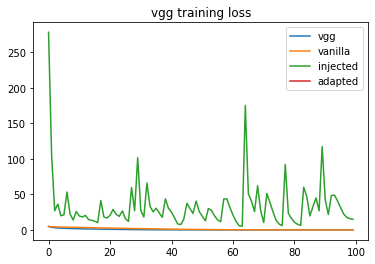

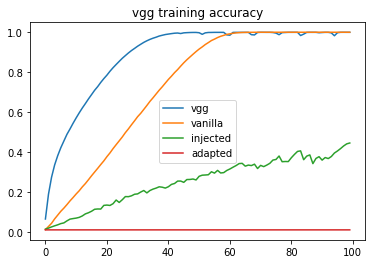

In [10]:
def plot(models, metric):
    for model in models:
        plt.plot(model.history.history['loss'], label=f'{model.name}')
        #plt.plot(model.history.history['val_loss'], label='val_loss', color='red')
    plt.legend()
    plt.title(f'{model_name} training loss')
    #plt.savefig(f'./plots/{model_name}/loss.png')
    plt.show()
   

    for model in models:
        plt.plot(model.history.history[f'{metric}'], label=f'{model.name}')
       # plt.plot(model.history.history[f'val_{metric}'], label=f'val_{metric}', color='red')
    plt.legend()
    plt.title(f'{model_name} training accuracy')
    #plt.savefig(f'./plots/{model_name}/accuracy.png')
    plt.show()

        
models = [model, vanilla_model, injected_model, adapted_model]
plot(models, 'accuracy')